<a href="https://colab.research.google.com/github/YheeK/YheeK/blob/main/Trading_style_and_Investment_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
from os.path import join
GD_PATH = 'MY Drive/Colab Notbooks/Thesis'
P_PATH = join (ROOT, GD_PATH)
print(P_PATH)

/content/drive/MY Drive/Colab Notbooks/Thesis


In [ ]:
%cd "{P_PATH}"

[Errno 2] No such file or directory: '/content/drive/MY Drive/Colab Notbooks/Thesis'
/content


In [ ]:
import pandas as pd

In [ ]:
Data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Thesis/DMDMnew.xlsx')

In [ ]:
Data.head()

,H1,H2,H3,H4,Hu1,Hu2,Hu3,Hu4,P1,P2,P3,Pro1,Pro2,Pro3,D score,DM
0,4,4,4,4,4,3,3,4,2,2,2,3,5,3,10,D
1,4,4,4,2,3,4,3,2,2,3,2,4,3,3,7,D
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8,D
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6,D
4,2,2,2,1,2,3,2,2,4,3,4,2,2,4,9,D


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   H1       304 non-null    int64 
 1   H2       304 non-null    int64 
 2   H3       304 non-null    int64 
 3   H4       304 non-null    int64 
 4   Hu1      304 non-null    int64 
 5   Hu2      304 non-null    int64 
 6   Hu3      304 non-null    int64 
 7   Hu4      304 non-null    int64 
 8   P1       304 non-null    int64 
 9   P2       304 non-null    int64 
 10  P3       304 non-null    int64 
 11  Pro1     304 non-null    int64 
 12  Pro2     304 non-null    int64 
 13  Pro3     304 non-null    int64 
 14  D score  304 non-null    int64 
 15  DM       304 non-null    object
dtypes: int64(15), object(1)
memory usage: 38.1+ KB


In [ ]:
pip install pingouin

     |████████████████████████████████| 182 kB 6.8 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |████████████████████████████████| 9.8 MB 28.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=edbe6a69a0a51743e87d5ffea56da8d1a20b41bbd13fe7c70d3c778943cb129a
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=71f735b86af930f2778c5978cb44ad3f5c28200921f7b68525c5109c251aac62
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
import pingouin as pg

In [ ]:
dfH=pd.DataFrame(Data[['D score', 'H1', 'H2', 'H3', 'H4']])
dfHu=pd.DataFrame(Data[['Hu1', 'Hu2', 'Hu3', 'Hu4' ]])
dfP=pd.DataFrame(Data[['P1', 'P2', 'P3']])
dfPro=pd.DataFrame(Data[[ 'Pro1', 'Pro2', 'Pro3']])

Cronbach’s Alpha 

In [ ]:
pg.cronbach_alpha(data=dfH)

(0.7680698932334017, array([0.724, 0.807]))

In [ ]:
pg.cronbach_alpha(data=dfHu)

(0.6742978033724338, array([0.61, 0.73]))

In [ ]:
pg.cronbach_alpha(data=dfP)

(0.81990946164893, array([0.782, 0.852]))

In [ ]:
pg.cronbach_alpha(data=dfPro)

(0.5544730552423902, array([0.46 , 0.635]))

In [ ]:
dvariables = pd.DataFrame(Data[['H1','H2','H3', 'H4', 'Hu1', 'Hu2', 'Hu3', 'Hu4', 'P1', 'P2', 'P3', 'Pro1', 'Pro2', 'Pro3']])

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Multicollinearity 

Person R : Dependent Variables


In [ ]:
corr_varibles = dvariables.corr(method='pearson')
display(corr_varibles)

,H1,H2,H3,H4,Hu1,Hu2,Hu3,Hu4,P1,P2,P3,Pro1,Pro2,Pro3
H1,1.000000,0.743681,0.762684,0.551023,0.174708,0.550952,0.362369,0.038488,0.109414,0.218160,0.235559,0.251744,0.275283,0.286571
H2,0.743681,1.000000,0.689073,0.571100,0.189313,0.491287,0.325792,0.150746,0.070536,0.187379,0.210102,0.220694,0.221516,0.205127
H3,0.762684,0.689073,1.000000,0.492184,0.147439,0.503960,0.342551,0.052526,-0.033710,0.131993,0.225276,0.203353,0.308994,0.317217
H4,0.551023,0.571100,0.492184,1.000000,0.293945,0.506703,0.394872,0.213402,0.142720,0.160542,0.284976,0.314851,0.109786,0.174767
Hu1,0.174708,0.189313,0.147439,0.293945,1.000000,0.224590,0.373112,0.608947,0.486098,0.530500,0.338731,0.370522,0.155960,0.148829
Hu2,0.550952,0.491287,0.503960,0.506703,0.224590,1.000000,0.373160,0.151932,0.169609,0.334500,0.448312,0.213015,0.230018,0.131382
Hu3,0.362369,0.325792,0.342551,0.394872,0.373112,0.373160,1.000000,0.275217,0.341267,0.359768,0.254249,0.178213,0.078540,0.188302
Hu4,0.038488,0.150746,0.052526,0.213402,0.608947,0.151932,0.275217,1.000000,0.525948,0.497086,0.277527,0.248076,0.138132,0.010574
P1,0.109414,0.070536,-0.033710,0.142720,0.486098,0.169609,0.341267,0.525948,1.000000,0.690051,0.500622,0.232903,-0.087244,0.057268
P2,0.218160,0.187379,0.131993,0.160542,0.530500,0.334500,0.359768,0.497086,0.690051,1.000000,0.615660,0.326625,0.098920,0.176303


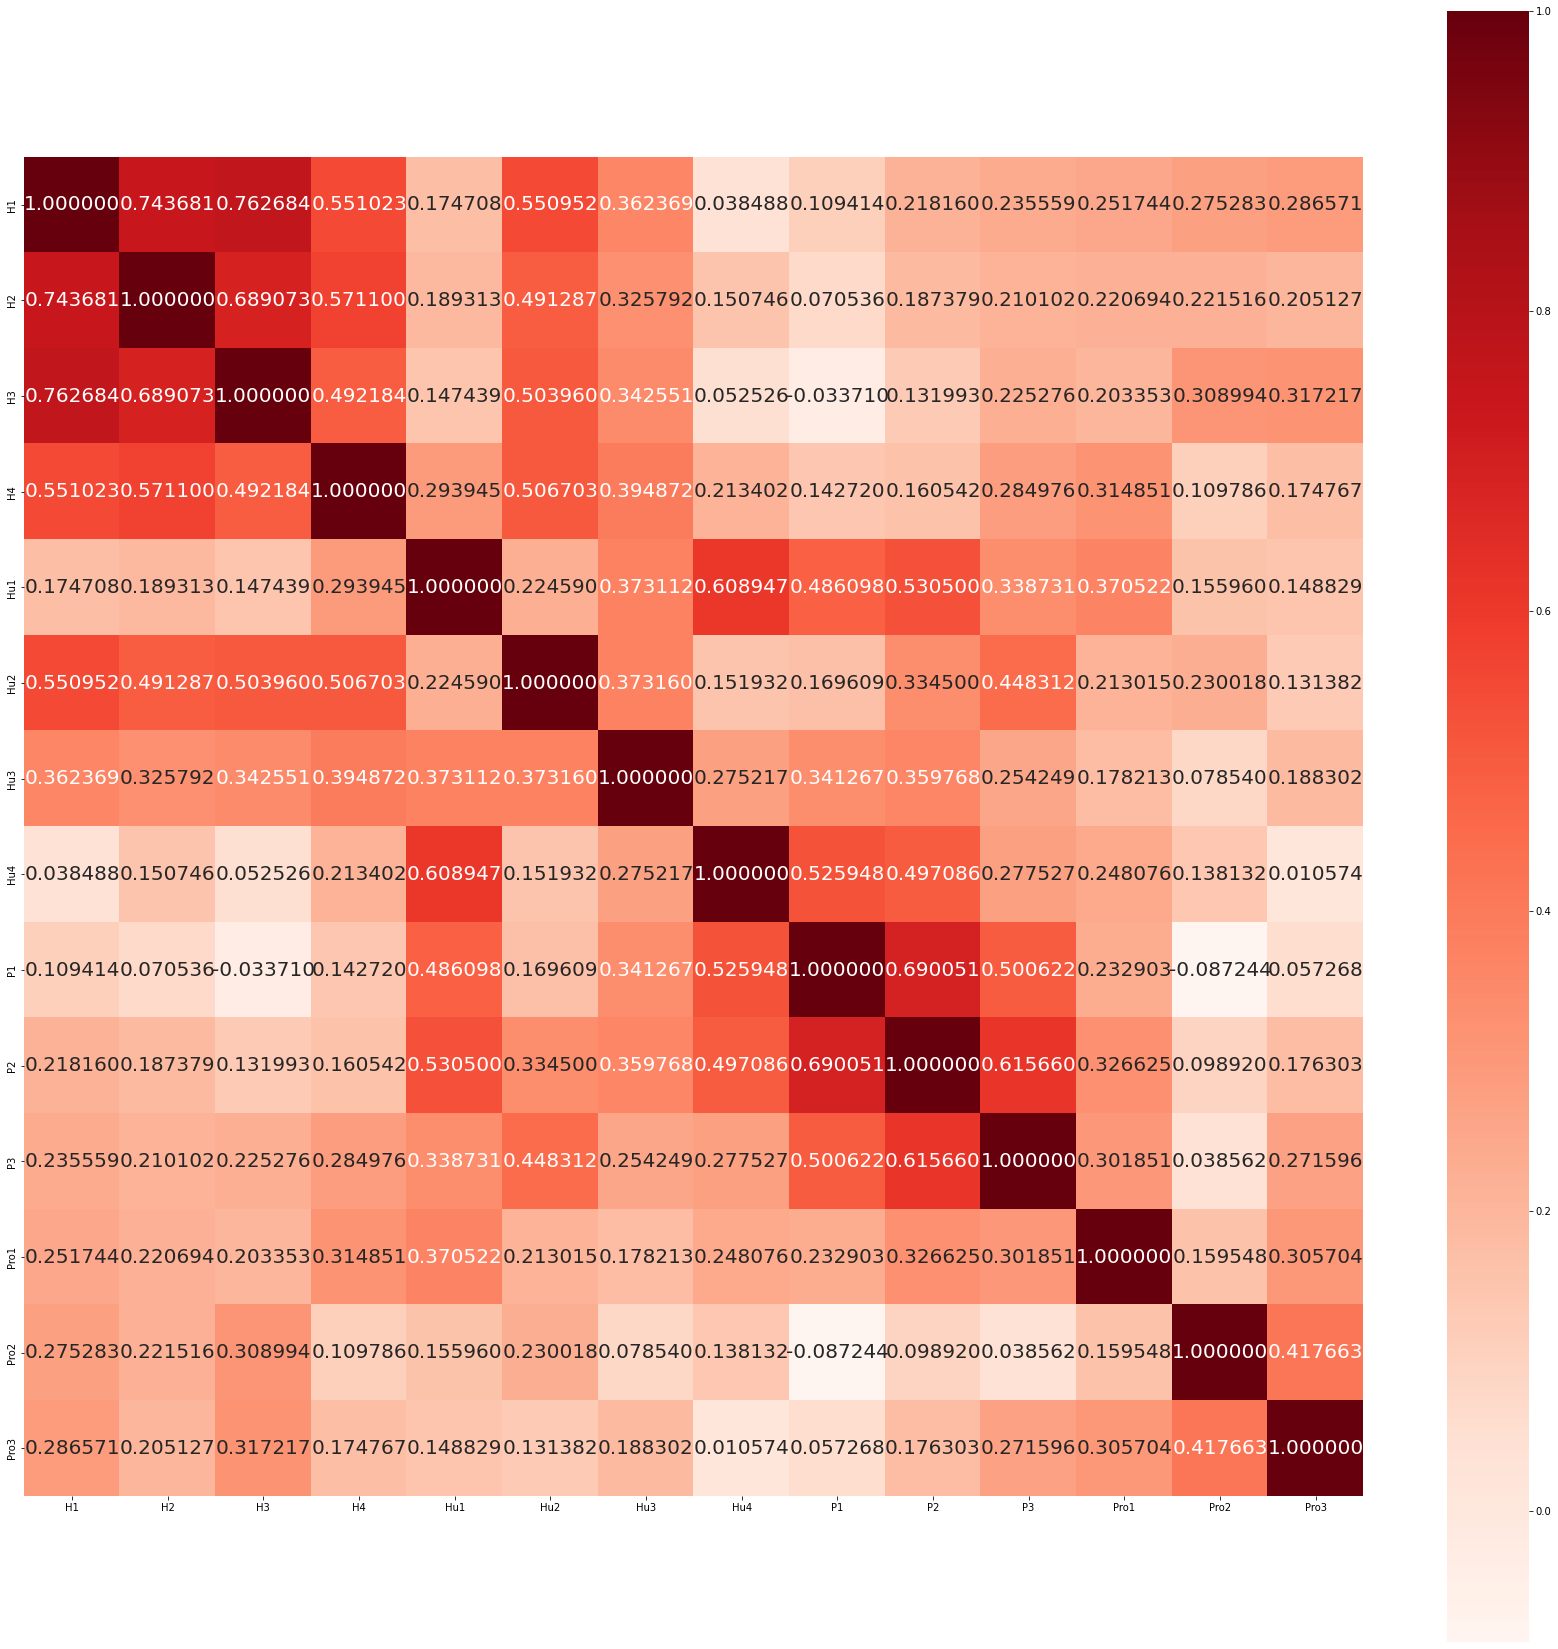

In [ ]:
plt.figure(figsize = (30,30))
dv_heatmap = sns.heatmap(corr_varibles, cbar=True, annot = True, annot_kws={'size' : 20}, fmt='2f', square = True, cmap = 'Reds')

VIF : Dependent Variables

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dvariables. values, i) for i in range(dvariables.shape[1])]
vif["features"] = dvariables.columns
vif

,VIF Factor,features
0,41.468359,H1
1,24.595931,H2
2,30.694411,H3
3,19.445858,H4
4,13.931119,Hu1
5,29.417880,Hu2
6,16.709934,Hu3
7,14.030333,Hu4
8,20.920284,P1
9,24.835615,P2


ANOVA analysis

In [ ]:
fit_H1 = ols(formula = 'H1 ~ C(DM)', data=Data).fit()
anova_lm(fit_H1)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,3.557895,3.557895,3.170973,0.075963
Residual,302.0,338.850000,1.122020,NaN,NaN


In [ ]:
fit_H2 = ols(formula = 'H2 ~ C(DM)', data=Data).fit()
anova_lm(fit_H2)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,11.096528,11.096528,8.729151,0.003378
Residual,302.0,383.903472,1.271204,NaN,NaN


In [ ]:
fit_H3 = ols(formula = 'H3 ~ C(DM)', data=Data).fit()
anova_lm(fit_H3)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,8.316118,8.316118,6.940033,0.008863
Residual,302.0,361.881250,1.198282,NaN,NaN


In [ ]:
fit_H4 = ols(formula = 'H4 ~ C(DM)', data=Data).fit()
anova_lm(fit_H4)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,4.554423,4.554423,3.95691,0.047581
Residual,302.0,347.603472,1.151005,NaN,NaN


In [ ]:
fit_P1 = ols(formula = 'P1 ~ C(DM)', data=Data).fit()
anova_lm(fit_P1)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,38.026316,38.026316,28.904068,1.524586e-07
Residual,302.0,397.312500,1.315604,NaN,NaN


In [ ]:
fit_P2 = ols(formula = 'P2 ~ C(DM)', data=Data).fit()
anova_lm(fit_P2)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,40.603655,40.603655,30.587469,6.916752e-08
Residual,302.0,400.893056,1.327460,NaN,NaN


In [ ]:
fit_P3 = ols(formula = 'P3 ~ C(DM)', data=Data).fit()
anova_lm(fit_P3)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,0.329861,0.329861,0.237797,0.626155
Residual,302.0,418.920139,1.387153,NaN,NaN


In [ ]:
fit_Hu1 = ols(formula = 'Hu1 ~ C(DM)', data=Data).fit()
anova_lm(fit_Hu1)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,49.351023,49.351023,34.083402,1.362131e-08
Residual,302.0,437.280556,1.447949,NaN,NaN


In [ ]:
fit_Hu2 = ols(formula = 'Hu2 ~ C(DM)', data=Data).fit()
anova_lm(fit_Hu2)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,2.339510,2.339510,2.434749,0.11972
Residual,302.0,290.186806,0.960883,NaN,NaN


In [ ]:
fit_Hu3 = ols(formula = 'Hu3 ~ C(DM)', data=Data).fit()
anova_lm(fit_Hu3)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,12.252961,12.252961,10.266574,0.001499
Residual,302.0,360.431250,1.193481,NaN,NaN


In [ ]:
fit_Hu4 = ols(formula = 'Hu4 ~ C(DM)', data=Data).fit()
anova_lm(fit_Hu4)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,40.372844,40.372844,33.185856,2.063009e-08
Residual,302.0,367.403472,1.216568,NaN,NaN


In [ ]:
fit_Pro1 = ols(formula = 'Pro1 ~ C(DM)', data=Data).fit()
anova_lm(fit_Pro1)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,8.039510,8.039510,7.022487,0.008473
Residual,302.0,345.736806,1.144824,NaN,NaN


In [ ]:
fit_Pro2 = ols(formula = 'Pro2 ~ C(DM)', data=Data).fit()
anova_lm(fit_Pro2)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,1.736988,1.736988,1.206055,0.27299
Residual,302.0,434.947222,1.440223,NaN,NaN


In [ ]:
fit_Pro3 = ols(formula = 'Pro3 ~ C(DM)', data=Data).fit()
anova_lm(fit_Pro3)

,df,sum_sq,mean_sq,F,PR(>F)
C(DM),1.0,4.789620,4.789620,4.083064,0.044197
Residual,302.0,354.259722,1.173045,NaN,NaN


In [ ]:
D_Data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Thesis/DData.xlsx')

In [ ]:
M_Data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Thesis/MData.xlsx')

In [ ]:
D_Data.head()

,타임스탬프,Gender,Age,1. You have rules for buy- sell time.,2. You follow your rules for buy-selling time.,"3. You decide, buy-sell time with your gut or emotion.","4.\tYou use automated program for trading (apps, website, self-developed algo etc.)",Which type of data do you analyze for trading,H1,H2,H3,H4,Hu1,Hu2,Hu3,Hu4,P1,P2,P3,Pro1,Pro2,Pro3,score
0,2021-08-03 15:15:38.109,Male,41,No,2,4,5,1,4,4,4,4,4,3,3,4,2,2,2,3,5,3,10
1,2021-08-04 04:20:11.937,Female,23,No,3,2,4,1,4,4,4,2,3,4,3,2,2,3,2,4,3,3,7
2,2021-09-23 20:03:52.913,Female,25,No,4,3,5,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,8
3,2021-09-24 04:39:42.690,Rather not to answer,29,No,1,1,5,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6
4,2021-09-24 08:49:29.832,Female,36,No,2,4,5,0,2,2,2,1,2,3,2,2,4,3,4,2,2,4,9


In [ ]:
D_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 23 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   타임스탬프                                                                                144 non-null    datetime64[ns]
 1   Gender                                                                               144 non-null    object        
 2   Age                                                                                  139 non-null    object        
 3   1. You  have rules for buy- sell time.                                               144 non-null    object        
 4   2. You follow your rules for buy-selling time.                                       144 non-null    int64         
 5   3. You decide, buy-sell time with your gut 

In [ ]:
M_Data.head()

,타임스탬프,Gender,Age,1. You have rules for buy- sell time.,2. You follow your rules for buy-selling time.,"3. You decide, buy-sell time with your gut or emotion.","4.\tYou use automated program for trading (apps, website, self-developed algo etc.)",Which type of data do you analyze for trading,H1,H2,H3,H4,Hu1,Hu2,Hu3,Hu4,P1,P2,P3,Pro1,Pro2,Pro3,M score
0,2021-06-25 15:34:13.038,Male,NaN,Yes,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6
1,2021-08-03 15:46:58.435,Female,30,Yes,3,2,1,1,3,1,1,2,2,4,4,1,5,5,5,4,1,4,5
2,2021-08-17 12:30:44.262,Male,36,Yes,4,3,1,2,3,1,3,2,5,4,4,4,4,5,4,2,4,4,7
3,2021-09-23 16:24:11.727,Female,24,Yes,4,5,3,1,4,3,4,3,4,5,4,3,4,4,4,4,4,3,8
4,2021-09-23 20:05:13.769,Male,24,Yes,3,4,1,1,3,3,2,4,5,4,2,4,4,3,2,4,1,3,5


In [ ]:
M_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 23 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   타임스탬프                                                                                160 non-null    datetime64[ns]
 1   Gender                                                                               160 non-null    object        
 2   Age                                                                                  152 non-null    object        
 3   1. You  have rules for buy- sell time.                                               160 non-null    object        
 4   2. You follow your rules for buy-selling time.                                       160 non-null    int64         
 5   3. You decide, buy-sell time with your gut 

Pearson R : Deiscrete - Investment Behavior

In [ ]:
df_D = pd.DataFrame(D_Data [['score', 'H2', 'H3','H4', 'Hu1', 'Hu3','Hu4', 'P1','P2', 'Pro1', 'Pro3']])
corr_D = df_D.corr(method = 'pearson')
display(corr_D)

,score,H2,H3,H4,Hu1,Hu3,Hu4,P1,P2,Pro1,Pro3
score,1.000000,0.347612,0.418393,0.444992,0.191804,0.292885,0.115144,0.210570,0.298629,0.084166,0.174461
H2,0.347612,1.000000,0.716118,0.619060,0.341249,0.441792,0.154149,0.171519,0.312921,0.235375,0.308431
H3,0.418393,0.716118,1.000000,0.557032,0.280993,0.463768,0.099224,0.059579,0.277106,0.213285,0.342401
H4,0.444992,0.619060,0.557032,1.000000,0.406447,0.518004,0.324010,0.312092,0.336411,0.306703,0.186482
Hu1,0.191804,0.341249,0.280993,0.406447,1.000000,0.282289,0.586593,0.469383,0.523304,0.393120,0.085190
Hu3,0.292885,0.441792,0.463768,0.518004,0.282289,1.000000,0.131514,0.182590,0.216747,0.153276,0.179968
Hu4,0.115144,0.154149,0.099224,0.324010,0.586593,0.131514,1.000000,0.417205,0.375340,0.331495,-0.076230
P1,0.210570,0.171519,0.059579,0.312092,0.469383,0.182590,0.417205,1.000000,0.646412,0.288943,0.042272
P2,0.298629,0.312921,0.277106,0.336411,0.523304,0.216747,0.375340,0.646412,1.000000,0.293196,0.104213
Pro1,0.084166,0.235375,0.213285,0.306703,0.393120,0.153276,0.331495,0.288943,0.293196,1.000000,0.326838


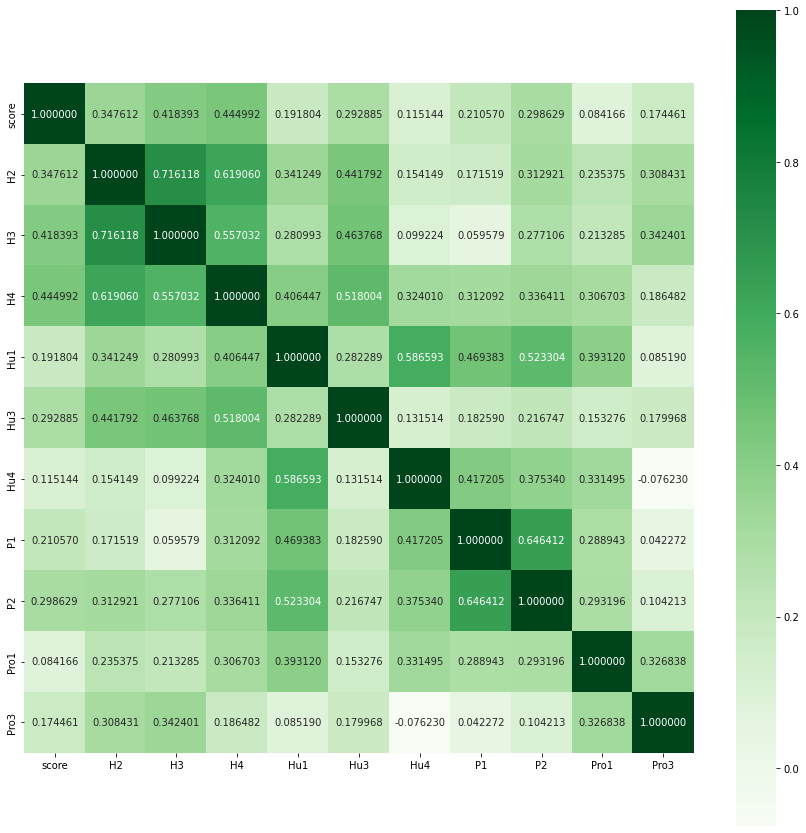

In [ ]:
plt.figure(figsize = (15,15))
D_heatmap = sns.heatmap(corr_D, cbar = True, annot = True, annot_kws={'size':10}, fmt = '2f', square = True, cmap = 'Greens')

Pearson R : Mechanical - Investment Behavior

In [ ]:
df_M = pd.DataFrame(M_Data [['score', 'H2', 'H3','H4', 'Hu1', 'Hu3','Hu4', 'P1','P2', 'Pro1', 'Pro3']])
corr_M = df_M.corr(method = 'pearson')
display(corr_M)

,score,H2,H3,H4,Hu1,Hu3,Hu4,P1,P2,Pro1,Pro3
score,1.000000,0.187979,0.181547,0.150934,0.345169,0.374742,0.409497,0.403044,0.396046,0.176843,0.124939
H2,0.187979,1.000000,0.641845,0.501218,0.173787,0.291966,0.277558,0.081191,0.199034,0.270201,0.141330
H3,0.181547,0.641845,1.000000,0.399570,0.130274,0.294285,0.113831,-0.040687,0.104354,0.250407,0.338647
H4,0.150934,0.501218,0.399570,1.000000,0.290940,0.329847,0.210685,0.050562,0.082161,0.371530,0.194844
Hu1,0.345169,0.173787,0.130274,0.290940,1.000000,0.392941,0.549171,0.396140,0.443098,0.296197,0.154864
Hu3,0.374742,0.291966,0.294285,0.329847,0.392941,1.000000,0.321281,0.426493,0.420318,0.157022,0.162772
Hu4,0.409497,0.277558,0.113831,0.210685,0.549171,0.321281,1.000000,0.532314,0.498241,0.113540,0.017685
P1,0.403044,0.081191,-0.040687,0.050562,0.396140,0.426493,0.532314,1.000000,0.673234,0.111817,0.005484
P2,0.396046,0.199034,0.104354,0.082161,0.443098,0.420318,0.498241,0.673234,1.000000,0.303097,0.192898
Pro1,0.176843,0.270201,0.250407,0.371530,0.296197,0.157022,0.113540,0.111817,0.303097,1.000000,0.259716


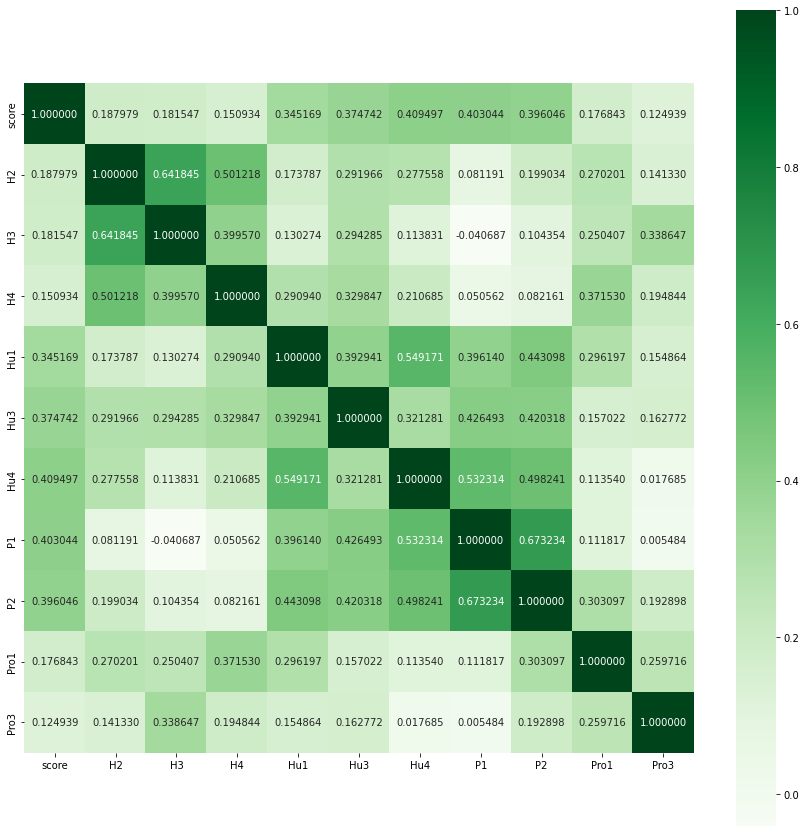

In [ ]:
plt.figure(figsize = (15,15))
M_heatmap = sns.heatmap(corr_M, cbar = True, annot =  True, annot_kws={'size' :10}, fmt = '2f', square = True, cmap = 'Greens')

Linear Regression : Discrete Trading

In [ ]:
from statsmodels.formula.api import ols
DH_ols = ols('score ~H2', data= D_Data).fit()
DH_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     19.52
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.96e-05
Time:                        13:42:02   Log-Likelihood:                -284.96
No. Observations:                 144   AIC:                             573.9
Df Residuals:                     142   BIC:                             579.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6210      0.453     14.618      0.000       5.726       7.516
H2             0.5484      0.124      4.418      0.000       0.303       0.794
==============================================================================
Omnibus:                        6.105   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.644
Skew:                          -0.322   Prob(JB):                       0.0981
Kurtosis:                       2.400   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.formula.api import ols
DH3_ols = ols('score ~H3', data= D_Data).fit()
DH3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.81e-07
Time:                        13:42:05   Log-Likelihood:                -280.38
No. Observations:                 144   AIC:                             564.8
Df Residuals:                     142   BIC:                             570.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1128      0.460     13.289      0.000       5.204       7.022
H3             0.6740      0.123      5.489      0.000       0.431       0.917
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.008
Skew:                          -0.187   Prob(JB):                        0.222
Kurtosis:                       2.398   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DH4_ols = ols('score ~H4', data= D_Data).fit()
DH4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     35.06
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.30e-08
Time:                        13:42:37   Log-Likelihood:                -278.35
No. Observations:                 144   AIC:                             560.7
Df Residuals:                     142   BIC:                             566.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0800      0.434     13.998      0.000       5.221       6.939
H4             0.7317      0.124      5.921      0.000       0.487       0.976
==============================================================================
Omnibus:                        3.160   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.964
Skew:                          -0.282   Prob(JB):                        0.227
Kurtosis:                       2.579   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DHu1_ols = ols('score ~Hu1', data= D_Data).fit()
DHu1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     5.424
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0213
Time:                        13:36:12   Log-Likelihood:                -291.54
No. Observations:                 144   AIC:                             587.1
Df Residuals:                     142   BIC:                             593.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7360      0.368     21.039      0.000       7.009       8.463
Hu1            0.2902      0.125      2.329      0.021       0.044       0.537
==============================================================================
Omnibus:                        7.622   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                4.384
Skew:                          -0.235   Prob(JB):                        0.112
Kurtosis:                       2.286   Cond. No.                         7.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DHu3_ols = ols('score ~Hu3', data= D_Data).fit()
DHu3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     13.32
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000367
Time:                        13:36:39   Log-Likelihood:                -287.78
No. Observations:                 144   AIC:                             579.6
Df Residuals:                     142   BIC:                             585.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8498      0.480     14.274      0.000       5.901       7.798
Hu3            0.4961      0.136      3.650      0.000       0.227       0.765
==============================================================================
Omnibus:                       11.237   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.297
Skew:                          -0.407   Prob(JB):                       0.0260
Kurtosis:                       2.256   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DHu4_ols = ols('score ~Hu4', data= D_Data).fit()
DHu4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.908
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.169
Time:                        13:36:50   Log-Likelihood:                -293.27
No. Observations:                 144   AIC:                             590.5
Df Residuals:                     142   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0134      0.394     20.321      0.000       7.234       8.793
Hu4            0.2042      0.148      1.381      0.169      -0.088       0.496
==============================================================================
Omnibus:                        8.246   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.669
Skew:                          -0.249   Prob(JB):                       0.0969
Kurtosis:                       2.271   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DP1_ols = ols('score ~P1', data= D_Data).fit()
DP1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     6.588
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0113
Time:                        13:37:10   Log-Likelihood:                -290.97
No. Observations:                 144   AIC:                             585.9
Df Residuals:                     142   BIC:                             591.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5174      0.417     18.012      0.000       6.692       8.342
P1             0.3345      0.130      2.567      0.011       0.077       0.592
==============================================================================
Omnibus:                        9.393   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.328
Skew:                          -0.286   Prob(JB):                       0.0697
Kurtosis:                       2.252   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DP2_ols = ols('score ~P2', data= D_Data).fit()
DP2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     13.90
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000277
Time:                        13:37:22   Log-Likelihood:                -287.51
No. Observations:                 144   AIC:                             579.0
Df Residuals:                     142   BIC:                             585.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0171      0.428     16.381      0.000       6.170       7.864
P2             0.5001      0.134      3.729      0.000       0.235       0.765
==============================================================================
Omnibus:                        4.212   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.752
Skew:                          -0.315   Prob(JB):                        0.153
Kurtosis:                       2.521   Cond. No.                         9.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DPro1_ols = ols('score ~Pro1', data= D_Data).fit()
DPro1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.013
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.316
Time:                        13:37:56   Log-Likelihood:                -293.72
No. Observations:                 144   AIC:                             591.4
Df Residuals:                     142   BIC:                             597.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0797      0.459     17.613      0.000       7.173       8.987
Pro1           0.1451      0.144      1.007      0.316      -0.140       0.430
==============================================================================
Omnibus:                       15.547   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.974
Skew:                          -0.218   Prob(JB):                       0.0504
Kurtosis:                       2.102   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DPro3_ols = ols('score ~Pro3', data= D_Data).fit()
DPro3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.458
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0365
Time:                        13:38:11   Log-Likelihood:                -292.01
No. Observations:                 144   AIC:                             588.0
Df Residuals:                     142   BIC:                             594.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6417      0.441     17.329      0.000       6.770       8.513
Pro3           0.2861      0.136      2.111      0.036       0.018       0.554
==============================================================================
Omnibus:                       19.525   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.634
Skew:                          -0.223   Prob(JB):                       0.0363
Kurtosis:                       2.047   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear Regression : Mechanical Trading

In [ ]:
MH_ols = ols('score ~H2', data= M_Data).fit()
MH_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.788
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0173
Time:                        13:39:24   Log-Likelihood:                -327.37
No. Observations:                 160   AIC:                             658.7
Df Residuals:                     158   BIC:                             664.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4072      0.453     11.925      0.000       4.512       6.303
H2             0.3357      0.140      2.406      0.017       0.060       0.611
==============================================================================
Omnibus:                        3.305   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.103
Skew:                          -0.341   Prob(JB):                        0.212
Kurtosis:                       3.015   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MH3_ols = ols('score ~H3', data= M_Data).fit()
MH3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     5.385
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0216
Time:                        13:43:10   Log-Likelihood:                -327.57
No. Observations:                 160   AIC:                             659.1
Df Residuals:                     158   BIC:                             665.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3477      0.493     10.853      0.000       4.374       6.321
H3             0.3373      0.145      2.321      0.022       0.050       0.624
==============================================================================
Omnibus:                        2.283   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.974
Skew:                          -0.268   Prob(JB):                        0.373
Kurtosis:                       3.098   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MH4_ols = ols('score ~H4', data= M_Data).fit()
MH4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.683
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0568
Time:                        13:43:23   Log-Likelihood:                -328.40
No. Observations:                 160   AIC:                             660.8
Df Residuals:                     158   BIC:                             667.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5563      0.483     11.504      0.000       4.602       6.510
H4             0.2860      0.149      1.919      0.057      -0.008       0.580
==============================================================================
Omnibus:                        1.505   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.590
Skew:                          -0.214   Prob(JB):                        0.452
Kurtosis:                       2.765   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MHu1_ols = ols('score ~Hu1', data= M_Data).fit()
MHu1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.82e-06
Time:                        13:43:43   Log-Likelihood:                -320.10
No. Observations:                 160   AIC:                             644.2
Df Residuals:                     158   BIC:                             650.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4716      0.448      9.971      0.000       3.586       5.357
Hu1            0.5637      0.122      4.623      0.000       0.323       0.805
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.851
Skew:                          -0.047   Prob(JB):                        0.654
Kurtosis:                       2.655   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MHu3_ols = ols('score ~Hu3', data= M_Data).fit()
MHu3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     25.81
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.05e-06
Time:                        13:43:58   Log-Likelihood:                -318.14
No. Observations:                 160   AIC:                             640.3
Df Residuals:                     158   BIC:                             646.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9455      0.510      7.733      0.000       2.938       4.953
Hu3            0.6634      0.131      5.081      0.000       0.406       0.921
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.514
Skew:                          -0.207   Prob(JB):                        0.469
Kurtosis:                       2.764   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MHu4_ols = ols('score ~Hu4', data= M_Data).fit()
MHu4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     31.83
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.58e-08
Time:                        13:44:14   Log-Likelihood:                -315.56
No. Observations:                 160   AIC:                             635.1
Df Residuals:                     158   BIC:                             641.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2582      0.410     10.379      0.000       3.448       5.069
Hu4            0.6850      0.121      5.642      0.000       0.445       0.925
==============================================================================
Omnibus:                        0.424   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.572
Skew:                          -0.038   Prob(JB):                        0.751
Kurtosis:                       2.717   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MP1_ols = ols('score ~P1', data= M_Data).fit()
MP1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     30.64
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.26e-07
Time:                        13:44:27   Log-Likelihood:                -316.07
No. Observations:                 160   AIC:                             636.1
Df Residuals:                     158   BIC:                             642.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8932      0.480      8.109      0.000       2.945       4.841
P1             0.6900      0.125      5.536      0.000       0.444       0.936
==============================================================================
Omnibus:                        0.892   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.917
Skew:                          -0.176   Prob(JB):                        0.632
Kurtosis:                       2.884   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MP2_ols = ols('score ~P2', data= M_Data).fit()
MP2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     29.39
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.17e-07
Time:                        13:44:42   Log-Likelihood:                -316.60
No. Observations:                 160   AIC:                             637.2
Df Residuals:                     158   BIC:                             643.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0496      0.462      8.766      0.000       3.137       4.962
P2             0.6411      0.118      5.422      0.000       0.408       0.875
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.371
Skew:                          -0.087   Prob(JB):                        0.831
Kurtosis:                       2.841   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MPro1_ols = ols('score ~Pro1', data= M_Data).fit()
MPro1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     5.101
Date:                Fri, 29 Oct 2021   Prob (F-statistic):             0.0253
Time:                        13:44:59   Log-Likelihood:                -327.71
No. Observations:                 160   AIC:                             659.4
Df Residuals:                     158   BIC:                             665.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3731      0.494     10.868      0.000       4.397       6.350
Pro1           0.3207      0.142      2.258      0.025       0.040       0.601
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.256
Skew:                          -0.211   Prob(JB):                        0.534
Kurtosis:                       2.896   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
MPro3_ols = ols('score ~Pro3', data= M_Data).fit()
MPro3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.505
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.115
Time:                        13:45:18   Log-Likelihood:                -328.99
No. Observations:                 160   AIC:                             662.0
Df Residuals:                     158   BIC:                             668.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6696      0.508     11.162      0.000       4.666       6.673
Pro3           0.2327      0.147      1.583      0.115      -0.058       0.523
==============================================================================
Omnibus:                        1.494   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.548
Skew:                          -0.225   Prob(JB):                        0.461
Kurtosis:                       2.827   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""